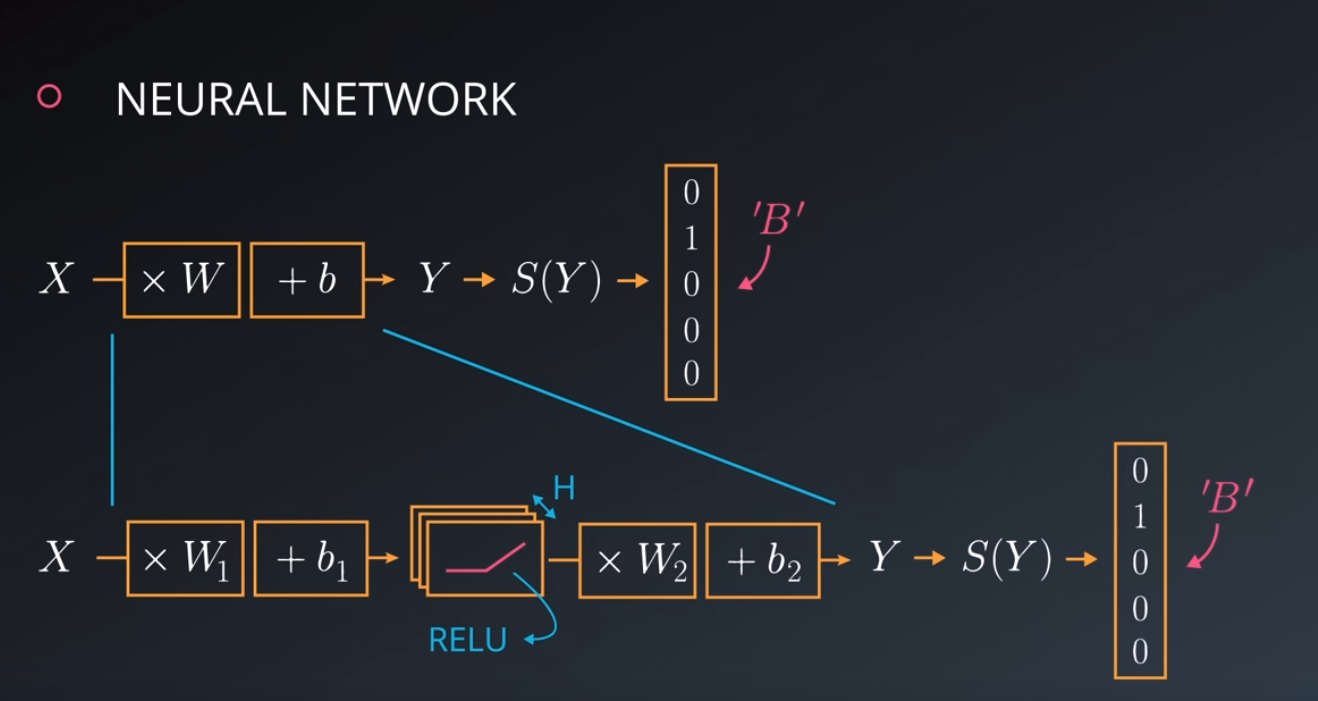

### Implementing relu in tensorflow

In [5]:
# Solution is available in the other "solution.py" tab
import tensorflow as tf

output = None
hidden_layer_weights = [
    [0.1, 0.2, 0.4],
    [0.4, 0.6, 0.6],
    [0.5, 0.9, 0.1],
    [0.8, 0.2, 0.8]]
out_weights = [
    [0.1, 0.6],
    [0.2, 0.1],
    [0.7, 0.9]]

# Weights and biases
weights = [
    tf.Variable(hidden_layer_weights),
    tf.Variable(out_weights)]
biases = [
    tf.Variable(tf.zeros(3)),
    tf.Variable(tf.zeros(2))]

# Input
features = tf.Variable([[1.0, 2.0, 3.0, 4.0], [-1.0, -2.0, -3.0, -4.0], [11.0, 12.0, 13.0, 14.0]])

# TODO: Create Model
# Hidden Layer with ReLU activation function
hidden_layer = tf.add(tf.matmul(features, weights[0]), biases[0])
hidden_layer = tf.nn.relu(hidden_layer)

output = tf.add(tf.matmul(hidden_layer, weights[1]), biases[1])

# TODO: Print session results
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print (sess.run(output))



[[ 5.1099997  8.44     ]
 [ 0.         0.       ]
 [24.010002  38.24     ]]


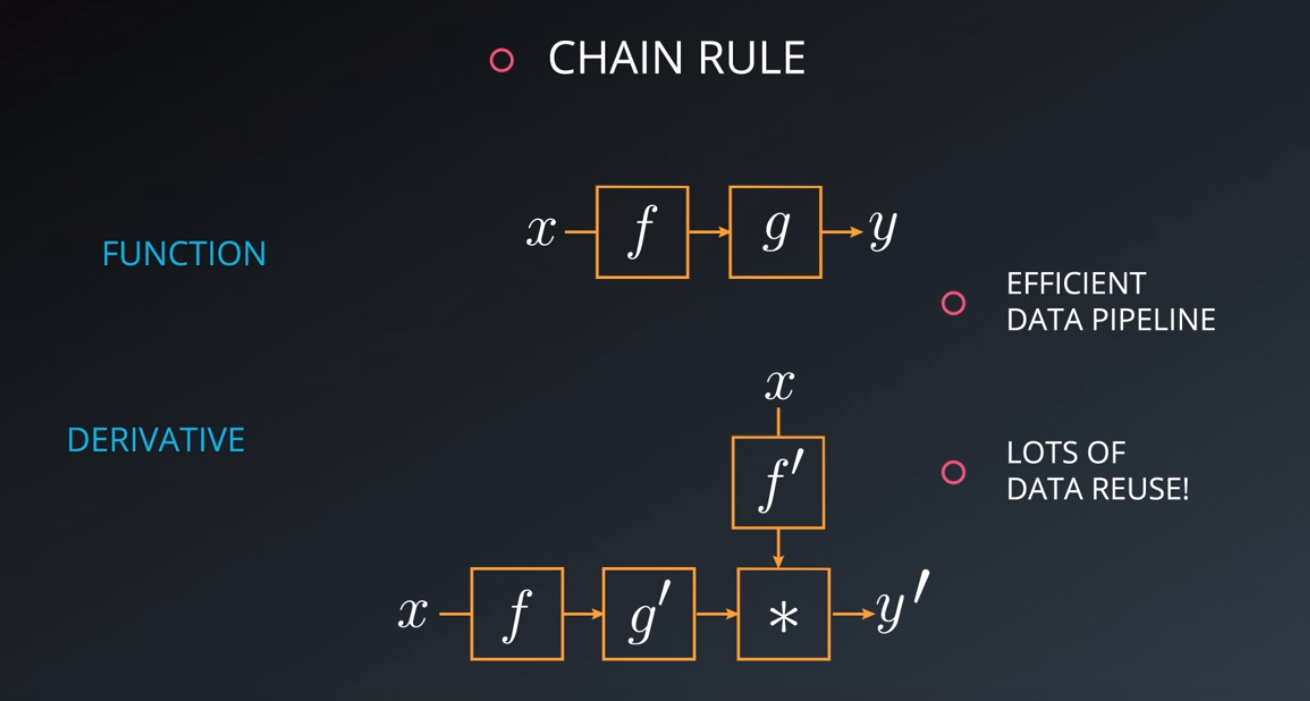

#### Back Propagation
In back propagation the model takes twice the speed as forward propagation. The idea is to go forward and then backward to get the gradients, which is used to update the weights of the model. This process is done several times in order to optimise the neural network model.

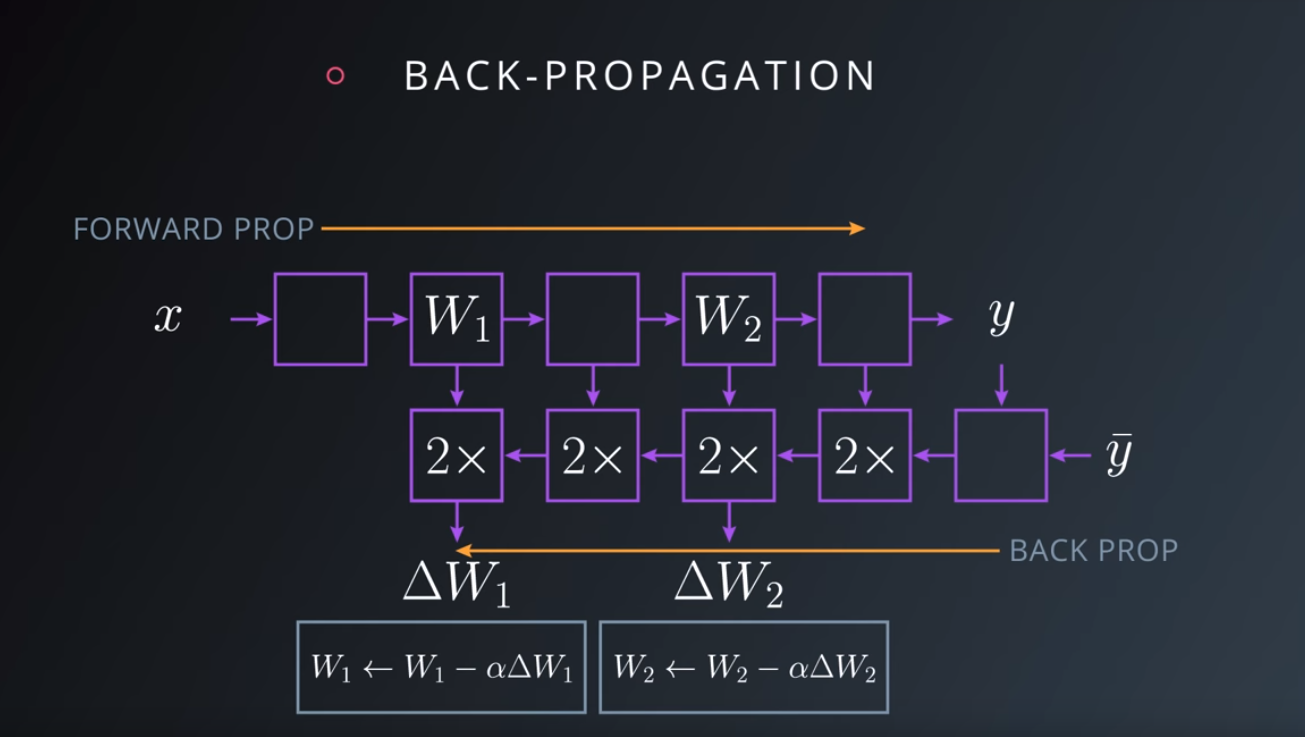

### Multilayer Perceptron

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(".", one_hot=True, reshape=False)


In [ ]:

import tensorflow as tf

# Parameters
learning_rate = 0.001
training_epochs = 20
batch_size = 128  # Decrease batch size if you don't have enough memory
display_step = 1

n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

n_hidden_layer = 256 # layer number of features

# Store layers weight & bias
weights = {
    'hidden_layer': tf.Variable(tf.random_normal([n_input, n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_hidden_layer, n_classes]))
}
biases = {
    'hidden_layer': tf.Variable(tf.random_normal([n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# tf Graph input
x = tf.placeholder("float", [None, 28, 28, 1])
y = tf.placeholder("float", [None, n_classes])

x_flat = tf.reshape(x, [-1, n_input])

# Hidden layer with RELU activation
layer_1 = tf.add(tf.matmul(x_flat, weights['hidden_layer']), biases['hidden_layer'])
layer_1 = tf.nn.relu(layer_1)
# Output layer with linear activation
logits = tf.matmul(layer_1, weights['out']) + biases['out']

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for epoch in range(training_epochs):
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        # Display logs per epoch step
        if epoch % display_step == 0:
            c = sess.run(cost, feed_dict={x: batch_x, y: batch_y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(c))
    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    # Decrease test_size if you don't have enough memory
    test_size = 256
    print("Accuracy:", accuracy.eval({x: mnist.test.images[:test_size], y: mnist.test.labels[:test_size]}))

### Save and Restore TensorFlow Models
Training a model can take hours. But once you close your TensorFlow session, you lose all the trained weights and biases. If you were to reuse the model in the future, you would have to train it all over again!

Fortunately, TensorFlow gives you the ability to save your progress using a class called tf.train.Saver. This class provides the functionality to save any tf.Variable to your file system.

#### Saving Variables
Let's start with a simple example of saving weights and bias Tensors. For the first example you'll just save two variables. Later examples will save all the weights in a practical model.

In [ ]:
import tensorflow as tf

# The file path to save the data
save_file = './model.ckpt'

# Two Tensor Variables: weights and bias
weights = tf.Variable(tf.truncated_normal([2, 3]))
bias = tf.Variable(tf.truncated_normal([3]))

# Class used to save and/or restore Tensor Variables
saver = tf.train.Saver()

with tf.Session() as sess:
    # Initialize all the Variables
    sess.run(tf.global_variables_initializer())

    # Show the values of weights and bias
    print('Weights:')
    print(sess.run(weights))
    print('Bias:')
    print(sess.run(bias))

    # Save the model
    saver.save(sess, save_file)

The Tensors weights and bias are set to random values using the tf.truncated_normal() function. The values are then saved to the save_file location, "model.ckpt", using the tf.train.Saver.save() function. (The ".ckpt" extension stands for "checkpoint".)

If you're using TensorFlow 0.11.0RC1 or newer, a file called "model.ckpt.meta" will also be created. This file contains the TensorFlow graph.

#### Loading Variables
Now that the Tensor Variables are saved, let's load them back into a new model.



In [ ]:
tf.reset_default_graph()

# Two Variables: weights and bias
weights = tf.Variable(tf.truncated_normal([2, 3]))
bias = tf.Variable(tf.truncated_normal([3]))

# Class used to save and/or restore Tensor Variables
saver = tf.train.Saver()

with tf.Session() as sess:
    # Load the weights and bias
    saver.restore(sess, save_file)

    # Show the values of weights and bias
    print('Weight:')
    print(sess.run(weights))
    print('Bias:')
    print(sess.run(bias))

You'll notice you still need to create the weights and bias Tensors in Python. The tf.train.Saver.restore() function loads the saved data into weights and bias.

Since tf.train.Saver.restore() sets all the TensorFlow Variables, you don't need to call tf.global_variables_initializer().

#### Save a Trained Model
Let's see how to train a model and save its weights.

First start with a model:

In [ ]:
# Remove previous Tensors and Operations
tf.reset_default_graph()

from tensorflow.examples.tutorials.mnist import input_data
import numpy as np

learning_rate = 0.001
n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

# Import MNIST data
mnist = input_data.read_data_sets('.', one_hot=True)

# Features and Labels
features = tf.placeholder(tf.float32, [None, n_input])
labels = tf.placeholder(tf.float32, [None, n_classes])

# Weights & bias
weights = tf.Variable(tf.random_normal([n_input, n_classes]))
bias = tf.Variable(tf.random_normal([n_classes]))

# Logits - xW + b
logits = tf.add(tf.matmul(features, weights), bias)

# Define loss and optimizer
cost = tf.reduce_mean(\
    tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)\
    .minimize(cost)

# Calculate accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Let's train that model, then save the weights:

In [ ]:
import math

save_file = './train_model.ckpt'
batch_size = 128
n_epochs = 100

saver = tf.train.Saver()

# Launch the graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # Training cycle
    for epoch in range(n_epochs):
        total_batch = math.ceil(mnist.train.num_examples / batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_features, batch_labels = mnist.train.next_batch(batch_size)
            sess.run(
                optimizer,
                feed_dict={features: batch_features, labels: batch_labels})

        # Print status for every 10 epochs
        if epoch % 10 == 0:
            valid_accuracy = sess.run(
                accuracy,
                feed_dict={
                    features: mnist.validation.images,
                    labels: mnist.validation.labels})
            print('Epoch {:<3} - Validation Accuracy: {}'.format(
                epoch,
                valid_accuracy))

    # Save the model
    saver.save(sess, save_file)
    print('Trained Model Saved.')

#### Load a Trained Model
Let's load the weights and bias from memory, then check the test accuracy.

In [ ]:
saver = tf.train.Saver()

# Launch the graph
with tf.Session() as sess:
    saver.restore(sess, save_file)

    test_accuracy = sess.run(
        accuracy,
        feed_dict={features: mnist.test.images, labels: mnist.test.labels})

print('Test Accuracy: {}'.format(test_accuracy))

### Loading the Weights and Biases into a New Model
Sometimes you might want to adjust, or "finetune" a model that you have already trained and saved.

However, loading saved Variables directly into a modified model can generate errors. Let's go over how to avoid these problems.

#### Naming Error
TensorFlow uses a string identifier for Tensors and Operations called name. If a name is not given, TensorFlow will create one automatically. TensorFlow will give the first node the name <Type>, and then give the name <Type>_<number> for the subsequent nodes. Let's see how this can affect loading a model with a different order of weights and bias:

In [ ]:
import tensorflow as tf

# Remove the previous weights and bias
tf.reset_default_graph()

save_file = 'model.ckpt'

# Two Tensor Variables: weights and bias
weights = tf.Variable(tf.truncated_normal([2, 3]))
bias = tf.Variable(tf.truncated_normal([3]))

saver = tf.train.Saver()

# Print the name of Weights and Bias
print('Save Weights: {}'.format(weights.name))
print('Save Bias: {}'.format(bias.name))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.save(sess, save_file)

# Remove the previous weights and bias
tf.reset_default_graph()

# Two Variables: weights and bias
bias = tf.Variable(tf.truncated_normal([3]))
weights = tf.Variable(tf.truncated_normal([2, 3]))

saver = tf.train.Saver()

# Print the name of Weights and Bias
print('Load Weights: {}'.format(weights.name))
print('Load Bias: {}'.format(bias.name))

with tf.Session() as sess:
    # Load the weights and bias - ERROR
    saver.restore(sess, save_file)

You'll notice that the name properties for weights and bias are different than when you saved the model. This is why the code produces the "Assign requires shapes of both tensors to match" error. The code saver.restore(sess, save_file) is trying to load weight data into bias and bias data into weights.

Instead of letting TensorFlow set the name property, let's set it manually:

In [ ]:
import tensorflow as tf

tf.reset_default_graph()

save_file = 'model.ckpt'

# Two Tensor Variables: weights and bias
weights = tf.Variable(tf.truncated_normal([2, 3]), name='weights_0')
bias = tf.Variable(tf.truncated_normal([3]), name='bias_0')

saver = tf.train.Saver()

# Print the name of Weights and Bias
print('Save Weights: {}'.format(weights.name))
print('Save Bias: {}'.format(bias.name))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.save(sess, save_file)

# Remove the previous weights and bias
tf.reset_default_graph()

# Two Variables: weights and bias
bias = tf.Variable(tf.truncated_normal([3]), name='bias_0')
weights = tf.Variable(tf.truncated_normal([2, 3]) ,name='weights_0')

saver = tf.train.Saver()

# Print the name of Weights and Bias
print('Load Weights: {}'.format(weights.name))
print('Load Bias: {}'.format(bias.name))

with tf.Session() as sess:
    # Load the weights and bias - No Error
    saver.restore(sess, save_file)

print('Loaded Weights and Bias successfully.')

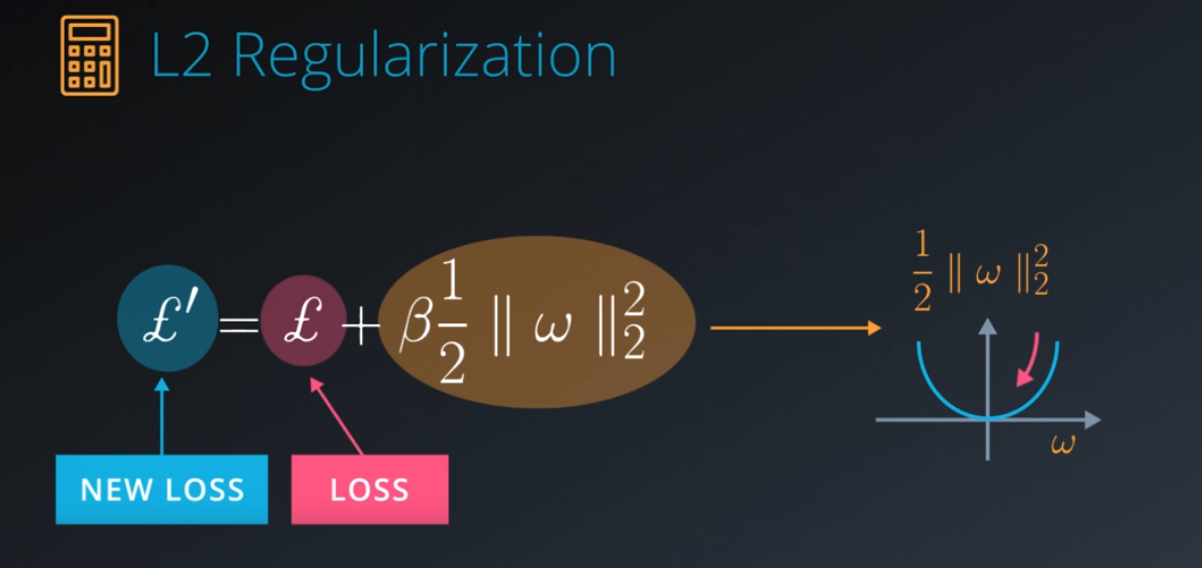

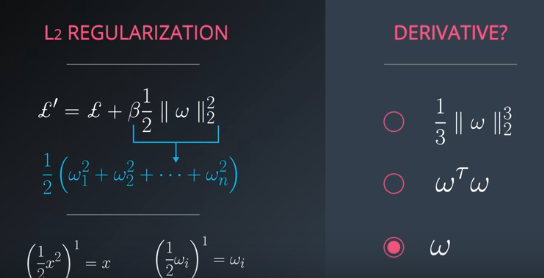

## Dropout 
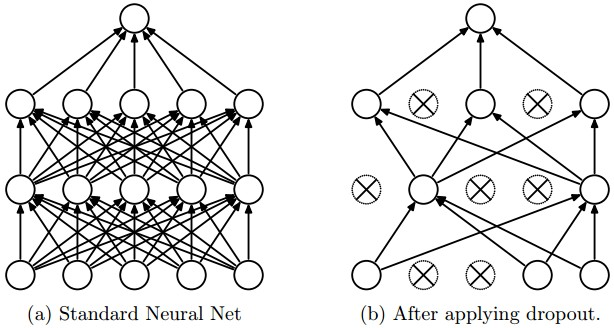

The above figure is referred as figure 1.

https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf

Dropout is a regularization technique for reducing overfitting. The technique temporarily drops units (artificial neurons) from the network, along with all of those units' incoming and outgoing connections. Figure 1 illustrates how dropout works.

TensorFlow provides the tf.nn.dropout() function, which you can use to implement dropout.

Let's look at an example of how to use tf.nn.dropout().



In [ ]:
keep_prob = tf.placeholder(tf.float32) # probability to keep units

hidden_layer = tf.add(tf.matmul(features, weights[0]), biases[0])
hidden_layer = tf.nn.relu(hidden_layer)
hidden_layer = tf.nn.dropout(hidden_layer, keep_prob)

logits = tf.add(tf.matmul(hidden_layer, weights[1]), biases[1])

The code above illustrates how to apply dropout to a neural network.

The tf.nn.dropout() function takes in two parameters:

hidden_layer: the tensor to which you would like to apply dropout

keep_prob: the probability of keeping (i.e. not dropping) any given unit.

keep_prob allows you to adjust the number of units to drop. In order to compensate for dropped units, tf.nn.dropout() multiplies all units that are kept (i.e. not dropped) by 1/keep_prob.

During training, a good starting value for keep_prob is 0.5.

During testing, use a keep_prob value of 1.0 to keep all units and maximize the power of the model.



You should only drop units while training the model. During validation or testing, you should keep all of the units to maximize accuracy.



#### QUIZ
This quiz will be starting with the code from the ReLU Quiz and applying a dropout layer. Build a model with a ReLU layer and dropout layer using the keep_prob placeholder to pass in a probability of 0.5. Print the logits from the model.

Note: Output will be different every time the code is run. This is caused by dropout randomizing the units it drops.

In [6]:
import tensorflow as tf

hidden_layer_weights = [
    [0.1, 0.2, 0.4],
    [0.4, 0.6, 0.6],
    [0.5, 0.9, 0.1],
    [0.8, 0.2, 0.8]]
out_weights = [
    [0.1, 0.6],
    [0.2, 0.1],
    [0.7, 0.9]]

# Weights and biases
weights = [
    tf.Variable(hidden_layer_weights),
    tf.Variable(out_weights)]
biases = [
    tf.Variable(tf.zeros(3)),
    tf.Variable(tf.zeros(2))]

# Input
features = tf.Variable([[0.0, 2.0, 3.0, 4.0], [0.1, 0.2, 0.3, 0.4], [11.0, 12.0, 13.0, 14.0]])

# TODO: Create Model with Dropout

keep_prob = tf.placeholder(tf.float32) # probability to keep units

hidden_layer = tf.add(tf.matmul(features, weights[0]), biases[0])
hidden_layer = tf.nn.relu(hidden_layer)
hidden_layer = tf.nn.dropout(hidden_layer, keep_prob)

logits = tf.add(tf.matmul(hidden_layer, weights[1]), biases[1])
# TODO: Print logits from a session

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(logits, feed_dict={keep_prob: 0.5}))


[[ 8.459999    9.399999  ]
 [ 0.82600003  1.5900002 ]
 [43.300003   48.16      ]]
